<a href="https://colab.research.google.com/github/vlasd45/web102/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv('/Housing.csv')
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Найдите количество спален(bedrooms) в самом дешёвом доме. Если таких несколько, укажите наименьшее значение

In [48]:
df.shape

(545, 1)

In [49]:
df.describe()

,"price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus"
count,545
unique,545
top,"13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,fur..."
freq,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 1 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                               --------------  ----- 
 0   price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus  545 non-null    object
dtypes: object(1)
memory usage: 4.4+ KB


In [ ]:
data[
    data['price'] == data['price'].min()
]['bedrooms'].min()


2

Найдите количество домов, в которых количество спален не больше количества ванных(bathrooms).


In [ ]:
data[
    data['bedrooms'] <= data['bathrooms']
].shape[0]

15

Сколько стоит самый дешёвый дом с гостевой комнатой(guestroom)

In [ ]:
data[
    data['guestroom'] == 'yes'
]['price'].min()

2450000

Рассмотрим дома ценой от 5.000.000 или до 2.000.000 денег. Какая часть из них может похвастаться кондиционированием воздуха(airconditioning)?


Постройте график, на котором будут отмечены все квартиры в виде точек, у которых x координата это цена(price), а y - площадь(area). Отметьте разными цветами точки, которые соответствуют квартирам с разным количеством парковочных мест(parking). Не забывайте о прозрачности.


Text(0.5, 1.0, 'Парковочные места')

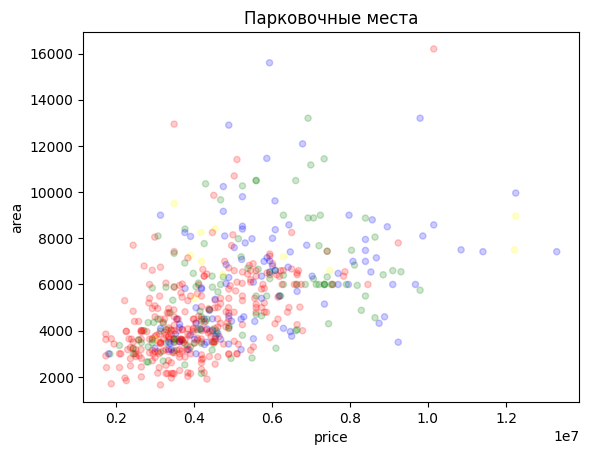

In [ ]:
data['parking'].unique()
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow'}
data.plot(kind='scatter', x='price', y='area', c=data['parking'].map(colors), alpha=0.2);
plt.title('Парковочные места')

Постройте на одном поле 4 поля с графиками, на каждом из которых будут отмечены точки-квартиры, где x - цена, а y - площадь. На первом графике разными цветами отметьте наличие/отсутствие гостевой комнаты(guestroom), на втором - подвала(basement), на третьем - обогрева с помощью горячей воды(hotwaterheating) и на четвёртом - предбанника(prefarea).
На графиках обязательно должны быть подписи осей, подпись графика(title), сетка, подписи с информацией о том, что обозначает каждый график. Дополнительная кастомизация крайне приветствуется.


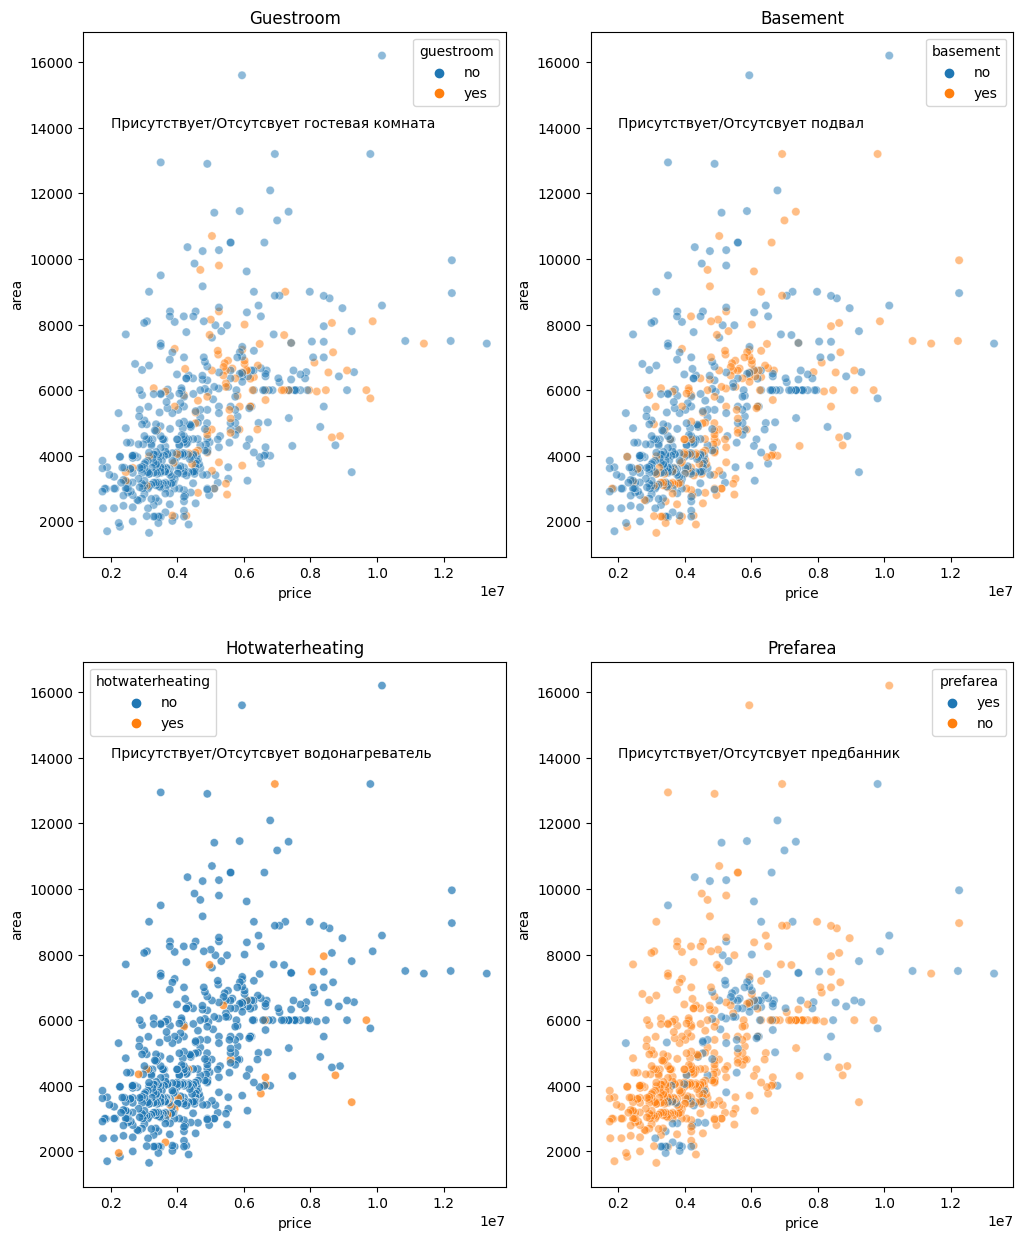

In [81]:

fig, ax = plt.subplots(2, 2, figsize=(12, 15))
sns.scatterplot(
    data=data,
    x=data['price'],
    y=data['area'],
    hue=data['guestroom'],
    alpha=0.5,
    color=('green'),
    ax=ax[0, 0],
).set_title("Guestroom")
ax[0, 0].text(2_000_000, 14000,'Присутствует/Отсутсвует гостевая комната')

sns.scatterplot(
    data=data,
    x=data['price'],
    y=data['area'],
    hue=data['basement'],
    alpha=0.5,
    ax=ax[0, 1],
).set_title("Basement")
ax[0, 1].text(2_000_000, 14000, 'Присутствует/Отсутсвует подвал')

sns.scatterplot(
    data=data,
    x=data['price'],
    y=data['area'],
    hue=data['hotwaterheating'],
    alpha=0.7,
    ax=ax[1, 0],
).set_title("Hotwaterheating")
ax[1, 0].text(2_000_000, 14000, 'Присутствует/Отсутсвует водонагреватель')

sns.scatterplot(
    data=data,
    x=data['price'],
    y=data['area'],
    hue=data['prefarea'],
    alpha=0.5,
    ax=ax[1, 1],
).set_title("Prefarea")
ax[1, 1].text(2_000_000, 14000, 'Присутствует/Отсутсвует предбанник');

Постройте 2 гистограммы распределения цены на одном графике. Одна должна соответствовать домам с наличием кондиционирования(airconditioning), а другой с отсутствием. Одна гистограмма может частично закрывать другую и данных может быть невидно. Решите эту проблему. График гистограмм должен быть оформлен не хуже предыдущих графиков.

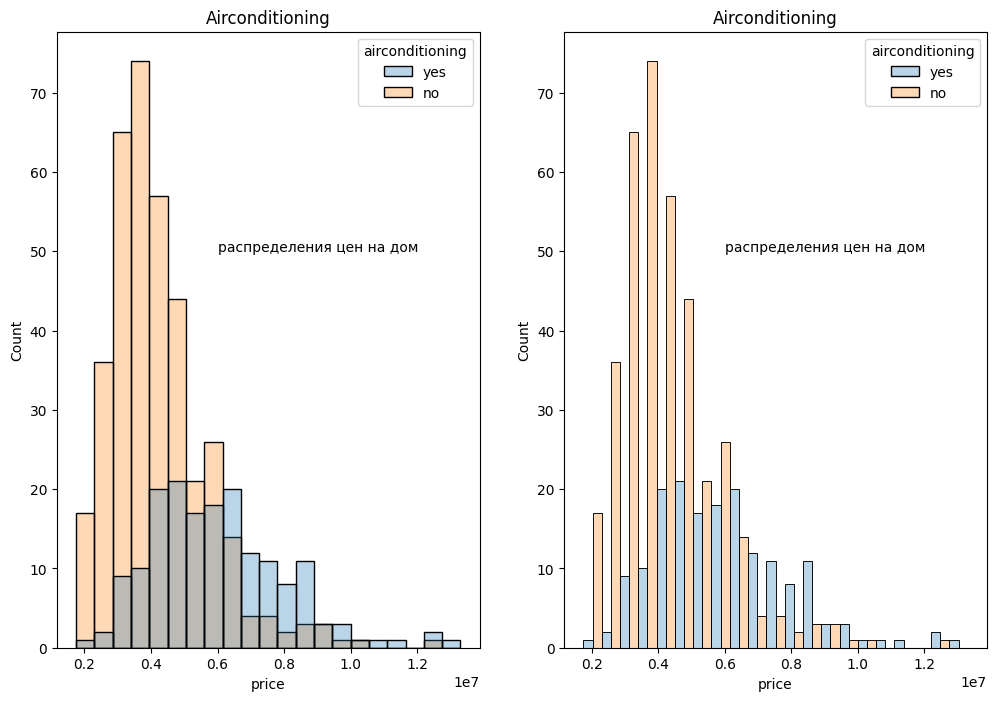

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, m  in enumerate(['layer', 'dodge', ]):
    sns.histplot(data=data, x="price", hue='airconditioning', multiple=m, alpha=0.3, ax=ax[i]).set_title("Airconditioning")
    ax[i].text(6_000_000, 50, 'распределения цен на дом  ');